In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style

style.use('seaborn')

## 3.2 Data Preparation

In [2]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


Above we see that the columns names and the string data are not standarized on upper or lower case. As well, the string data does not have a consistency for denoting word spacing.

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_cols = list(df.dtypes[df.dtypes == "object"].index)

for c in categorical_cols:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [5]:
df.head(5).T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


Now, we look at the dtypes. We see that total charges is a number, but its described here as an object(str). While seniorcitizen is a boolean, but is treated as an int

In [6]:
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

We can interpret that the reason for total charges to be treated as object was because the NaN values are encountered as *(_)* in the dataset. We need to indictate that when finding this string, it is actually representing a NaN

In [7]:
tc = pd.to_numeric(df.totalcharges,errors='coerce')
tc.isnull().sum()

11

In [8]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [9]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

Now, we look at the churn variable, which is the target of this project. The data is represented as yes/no, but we can replace it with 1/0

In [10]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [11]:
df.churn = (df.churn == 'yes').astype(int)

# 3.3 Setting up a validation framework

In [12]:
from sklearn.model_selection import train_test_split

We want to split into train/val/test with 0.6/0.2/0.2 split size

In [13]:
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=1)
print(f"full train has {len(df_full_train)} samples which is 80% of the dataset, test dataset has {len(df_test)} samples which is 20%")

full train has 5634 samples which is 80% of the dataset, test dataset has 1409 samples which is 20%


In [14]:
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)
print(f"train has {len(df_train)} samples which is 60% of the dataset, val dataset has {len(df_val)} samples which is 20%")

train has 4225 samples which is 60% of the dataset, val dataset has 1409 samples which is 20%


In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [18]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# 3.4 EDA

- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [19]:
df_full_train = df_full_train.reset_index(drop=True)

In [20]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

When we take a binary dataset and apply the mean we will get the percentage/rate of the true values. For our case, we will call this the churn_rate. So, 27% of our customers are churning

In [21]:
global_churn_rate = np.round(df_full_train.churn.mean(),2)
global_churn_rate

0.27

Now, we need to explore our dtypes. We see that *seniorcitizen* is actually a boolean. We have then 3 numerical variables: tenure, monthlycharges and totalcharges

In [22]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [23]:
numerical = ['tenure','monthlycharges','totalcharges']
categorical = [c for c in df_full_train.columns if c not in numerical+['churn']]
categorical.remove('customerid')
print(categorical)

['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


In [24]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature Importance: Churn rate and risk ratio 

Feature importance analysis (part of EDA) - identifying which features affect our target variable

- Churn rate
- Risk ratio
- Mutual information - later

### Churn rate

In [25]:
df_full_train.groupby('gender')['churn'].mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

If we remember, the global churn is 27%. So, the churn rate between male and female is not significatively different than it. Lets look at the variable partner

In [26]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [27]:
df_full_train.groupby('partner')['churn'].mean()

partner
no     0.329809
yes    0.205033
Name: churn, dtype: float64

If we compare with the globla churn rate, we see that the churn rate on partners is ~7% lower and ~5% higher when the customer is not a partner

In [28]:
global_churn_rate

0.27

In [29]:
churn_partner = df_full_train[df_full_train.partner == "yes"].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == "no"].churn.mean()

print(f"Diff between globalchurn_rate and rate when the customer is partner is {global_churn_rate - churn_partner}")
print(f"Diff between globalchurn_rate and rate when the customer is not partner is {global_churn_rate - churn_no_partner}")


Diff between globalchurn_rate and rate when the customer is partner is 0.06496669133974836
Diff between globalchurn_rate and rate when the customer is not partner is -0.0598090040927694


So, one way to interpret this is:

1) Difference between global and group churn rates. If the difference is > 0, it means that the group is less likely to churn. If the difference is < 0 the group is more likely to churn.

### Risk ratio

2) Risk ratio: $risk = \frac{Group}{Global}$, when risk > 1 the group is most likely to churn, when risk < 1 the group is less likely to churn

In [30]:
print(churn_no_partner/global_churn_rate)
print(churn_partner/global_churn_rate)

1.22151482997322
0.7593826246675986


```sql
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [31]:
df_full_train.groupby('gender')[c].agg(['mean','count']).assign(diff= lambda x: x['mean'] - global_churn_rate,risk = lambda x: x['mean']/global_churn_rate)

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


In [32]:
for c in categorical:
    print('---------')
    print(c)
    df_group = (df_full_train.groupby(c)['churn'].agg(['mean','count'])
                                                .assign(diff= lambda x: x['mean'] - global_churn_rate,
                                                risk = lambda x: x['mean']/global_churn_rate))
    display(df_group)

---------
gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


---------
seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027730,0.897297
1,0.413377,912,0.143377,1.531027


---------
partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059809,1.221515
yes,0.205033,2702,-0.064967,0.759383


---------
dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043760,1.162074
yes,0.165666,1666,-0.104334,0.613579


---------
phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028684,0.893764
yes,0.273049,5087,0.003049,1.011292


---------
multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012593,0.953361
no_phone_service,0.241316,547,-0.028684,0.893764
yes,0.290742,2387,0.020742,1.076820


---------
internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077653,0.712398
fiber_optic,0.425171,2479,0.155171,1.574709
no,0.077805,1221,-0.192195,0.288167


---------
onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150921,1.558967
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.153226,1612,-0.116774,0.567503


---------
onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134323,1.497494
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.217232,1915,-0.052768,0.804564


---------
deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125875,1.466205
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.230412,1940,-0.039588,0.853379


---------
techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148914,1.551534
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.159926,1632,-0.110074,0.592320


---------
streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072832,1.269747
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.302723,2167,0.032723,1.121195


---------
streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068906,1.255209
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.307273,2200,0.037273,1.138047


---------
contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161701,1.598893
one_year,0.120573,1186,-0.149427,0.446568
two_year,0.028274,1344,-0.241726,0.104718


---------
paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097929,0.637300
yes,0.338151,3321,0.068151,1.252412


---------
paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101829,0.622854
credit_card_(automatic),0.164339,1217,-0.105661,0.608661
electronic_check,0.455890,1893,0.185890,1.688482
mailed_check,0.193870,1305,-0.076130,0.718036


## 3.6 Feature Importance: Mutual information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

https://en.wikipedia.org/wiki/Mutual_information

In [33]:
from sklearn.metrics import mutual_info_score

In [34]:
mutual_info_score(df_full_train.contract,df_full_train.churn)

0.0983203874041556

In [35]:
mutual_info_score(df_full_train.gender,df_full_train.churn)

0.00011748462111432767

In [36]:
def mutual_info_churn_score(series):
    return mutual_info_score(series,df_full_train.churn)

In [37]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation

A way to measure dependency between two numerical variables where the value of the correlation (r) is   $-1 \leq r \geq 1$

In [38]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [39]:
df_full_train[(df_full_train.tenure <= 2)].churn.mean()

0.5953420669577875

In [40]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12 )].churn.mean()


0.3994413407821229

In [41]:
df_full_train[(df_full_train.tenure > 12)].churn.mean()

0.17634908339788277

In [42]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

## 3.8 One-hot Encoding

In [43]:
from sklearn.feature_extraction import DictVectorizer

In [44]:
dicts = df_train[['gender','contract']].iloc[:100].to_dict(orient='records')

In [45]:
dv = DictVectorizer(sparse=False)

In [46]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [47]:
sm = dv.transform(dicts)
print(sm.shape)

(100, 5)


In [48]:
dv.get_feature_names()

/home/dc/rrg/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [97]:
train_dicts = df_train[categorical+numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [98]:
len(dv.get_feature_names())

/home/dc/rrg/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


45

In [99]:
X_train.shape

(4225, 45)

In [100]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
print(X_val.shape)

(1409, 45)


## 3.9 Logistic regression

- Binary classification
- Linear vs Logistic regression 

For 
$$ Y_i \in \{0,1\}$$ 
where $0$ is negative and $1$ is possitive, then we have

$$ g(X_i) = sigmoid(W_0 + W^T.X_i)$$ 

We use the *sigmoid function* to convert the score $W_0 + W^T.X_i$ into a probability

In [53]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
    

In [54]:
z = np.linspace(-10,10,51)

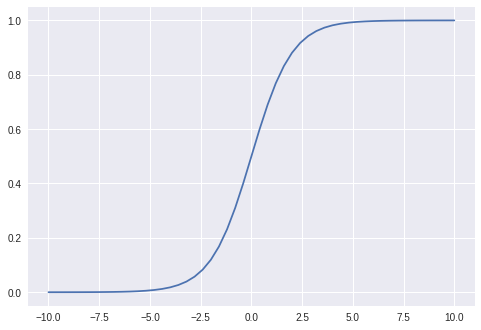

In [55]:
plt.plot(z,sigmoid(z))

In [56]:
def linear_regression(xi): 
    result = w0 + np.sum(xi*w)

In [57]:
def logistic_regression(xi):
    score = w0 + np.sum(xi*w)

    result = sigmoid(score)
    return result 

## 3.10 Training logistic regression with Scikit-Learn

- Train a model with Scikit-learn
- Apply to validation dataset 
- Calculate the accuracy

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [64]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.071,  0.   ])

In [65]:
model.intercept_

array([-0.10916964])

In [67]:
model.predict(X_train) # Hard predictions. Converted from probs to label

array([0, 1, 1, ..., 1, 0, 1])

When looking at the soft predictions, we see that there are 2 columns which represent the proability to be negative (0) or positive (1)

In [68]:
model.predict_proba(X_train) # Soft Predictions.

array([[0.90432884, 0.09567116],
       [0.3205298 , 0.6794702 ],
       [0.36619309, 0.63380691],
       ...,
       [0.46850581, 0.53149419],
       [0.95759099, 0.04240901],
       [0.30126101, 0.69873899]])

In [80]:
y_pred = model.predict_proba(X_val)[:,1]
churn_decision = (y_pred >= 0.5)

In [81]:
(y_val == churn_decision.astype(int)).mean()

0.8034066713981547

In [82]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred 
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val


In [83]:
df_pred

,probability,prediction,actual
0,0.008986,0,0
1,0.203984,0,0
2,0.211689,0,0
3,0.543239,1,1
4,0.213316,0,0
...,...,...,...
1404,0.313103,0,0
1405,0.039314,0,1
1406,0.136321,0,0
1407,0.799843,1,1


In [84]:
df_pred['correct'] = df_pred.prediction == df_pred.actual 


In [85]:
df_pred

,probability,prediction,actual,correct
0,0.008986,0,0,True
1,0.203984,0,0,True
2,0.211689,0,0,True
3,0.543239,1,1,True
4,0.213316,0,0,True
...,...,...,...,...
1404,0.313103,0,0,True
1405,0.039314,0,1,False
1406,0.136321,0,0,True
1407,0.799843,1,1,True


In [86]:
df_pred.correct.mean()

0.8034066713981547

## 3.11 Model interpretation

- Look at the coefficients
- Train a smaller model with fewer features

In [88]:
dict(zip(dv.get_feature_names(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.474,
 'contract=one_year': -0.175,
 'contract=two_year': -0.407,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [91]:
small = ['contract','tenure','monthlycharges']

In [92]:
df_train[small]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
...,...,...,...
4220,one_year,52,80.85
4221,month-to-month,18,25.15
4222,month-to-month,2,90.00
4223,two_year,27,24.50


In [93]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [101]:
dv_small = DictVectorizer(sparse=False)
X_train_small = dv_small.fit_transform(dicts_train_small)

In [96]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [102]:
X_val_small = dv_small.transform(dicts_val_small)

In [103]:
model_small = LogisticRegression()
model_small.fit(X_train_small,y_train)

LogisticRegression()

In [111]:
w0 = model_small.intercept_[0]

In [112]:
w = model_small.coef_[0]

In [109]:
dict(zip(dv_small.get_feature_names_out(),w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [114]:
w0

-2.4767756602816164

In [117]:
sigmoid(w0.round(3))

0.07748637721604845

In [118]:
sigmoid(w0.round(3) + 0.97)

0.18138381862832387

In [119]:
sigmoid(w0.round(3) + 0.97 + 50*0.027)

0.46083042453820466

In [120]:
sigmoid(w0.round(3) + 0.97 + 50*0.027 + 5*(-0.036))

0.41653839648976954

What if the customer is only 1 month with us, it pays 60/month and it is a monthly contract

In [123]:
_ = w0 + 0.97 + 60*0.027 + 1*(-0.036)
print(_)
sigmoid(_)

0.07722433971838341


0.5192964961694132

## 3.12 Using the model

In [124]:
dict_full_train = df_full_train[categorical+numerical].to_dict(orient='records')

In [125]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_full_train)

In [126]:
y_full_train = df_full_train.churn.values

In [128]:
model_final = LogisticRegression()
model_final.fit(X_full_train,y_full_train)

LogisticRegression()

In [129]:
dict_test = df_test[categorical+numerical].to_dict(orient='records')
X_test = dv.transform(dict_test)

In [130]:
y_pred = model_final.predict_proba(X_test)[:,1]

In [131]:
churn_decision = (y_pred >= 0.5)

In [132]:
(y_test == churn_decision).mean()

0.815471965933286

In [134]:
customer = dict_test[10]

In [136]:
model_final.predict_proba(dv.transform(customer))[:,1]

array([0.4056811])

In [137]:
y_test[10]

0